In [8]:
# Import data
# Before building the model, should always visualize the data to see if
#     There are problems with the data
#     The problem is amenable to machine learning
#     The dataset contains information needed to solve the problem.

# A pair plot creates a scatterplot for every pair of features, to show their relationships
#     This is feasible for datasets with a small number of features
#     However, a pair plot cannot show interaction of all of features at once, 
#     so some interesting aspects of the data may not be revealed.

import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris_dataset = load_iris()
#print(iris_dataset['DESCR']) 

In [11]:
 
## Create a dataframe from the NumPy array, labeled using feature names
iris_dataframe = pd.DataFrame(iris_dataset["data"], 
                              columns=iris_dataset["feature_names"])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 432x288 with 0 Axes>

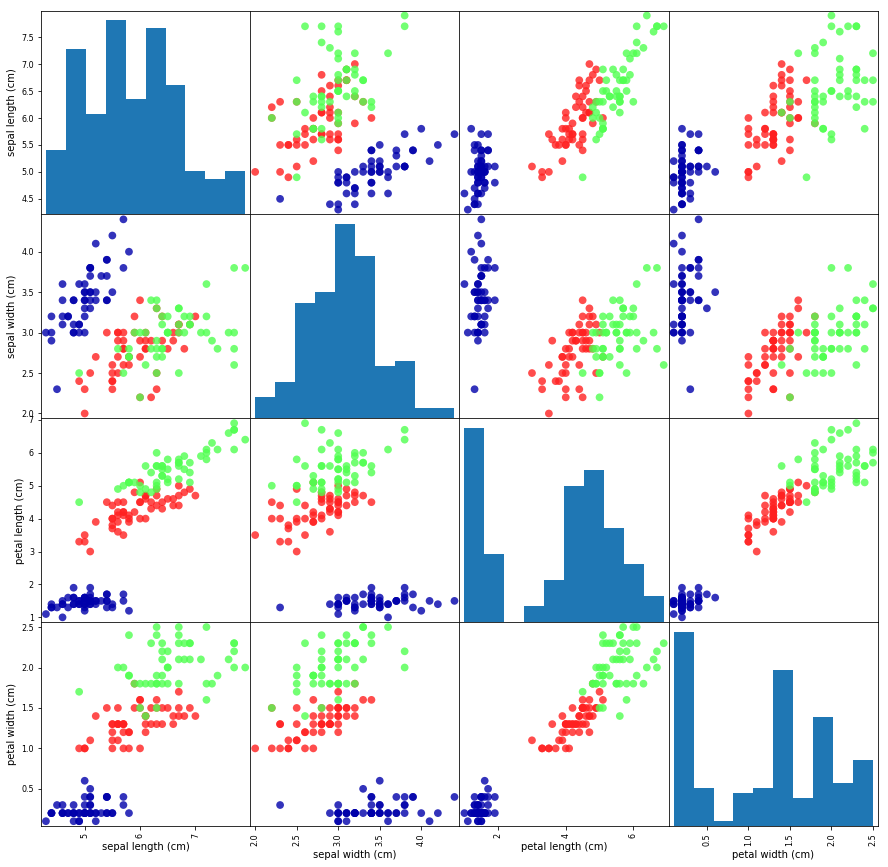

In [16]:
## Ceate a scatter matrix from the dataframe, color by the target variable

plt.figure(2) 

grr = pd.plotting.scatter_matrix(iris_dataframe, 
                                    c=iris_dataset["target"], 
                                    figsize=(15, 15), 
                                    marker='o', 
                                    hist_kwds={'bins': 10}, 
                                    s=60, 
                                    alpha=.8, 
                                    cmap=mglearn.cm3)
plt.show(2)

In [19]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], 
                                                    random_state=0)
#print(X_train)

In [25]:
# The entire training set is stored in memory when constructing a kNN model
#     To make a prediction for a new data point, 
#     the algorithm finds the point in the training set that is closest 
#     to the new point and assigns the label of this training point to the new data point.
#     k denotes the given number of neighbours that are considered 

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=15, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=None, 
                           n_neighbors=1, 
                           p=2,
                           weights='uniform')

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
X_new = np.array([[5, 2.9, 1, 0.2]])
  
prediction = knn.predict(X_new)
  
print(iris_dataset['target_names'][prediction])

['setosa']


In [28]:
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)
print(test_accuracy)

0.9736842105263158
